# Machine Learning Midterm, Aug Semester, 2020

In this exam, you will demonstrate your understanding of the material from the lectures, tutorials, and problem sets.

Exam submission is on Gradescope. Before you begin the exam, make sure you have created an account at [http://gradescope.com](http://gradescope.com). Then you have to sign up for AT82.03 in Aug 2020. The course signup code is MY3YPW .

For each question, insert your answer directly in this sheet. When complete, export the sheet as a PDF and upload to Gradescope. If you are using puffer.cs.ait.ac.th, in JupyterLab, click on "File" then "Export Notebook As" then select PDF. If you are running Jupyter on your own machine, you may need to install the `nbconvert` package with pip or conda.

Note that you have **2.5 hours** to do the exam. Also note that there are short answer questions that you may be able to answer faster than the coding questions. You might consider answering those questions first to get as much credit as possible!

## Question 1 (10 points)

We have seen that regression problems and binary classification problems have seemingly different cost functions. For regression, we normally use the cost function
$$J(\theta) = \sum_{i=1}^m \left( h_\theta(\mathbf{x}^{(i)}) - y^{(i)} \right)^2,$$
whereas for binary classifiation, we normally use the cost function
$$J(\theta) = \sum_{i=1}^m \left( y^{(i)} \log h_\theta(\mathbf{x}^{(i)}) + (1-y^{(i)})\log(1 - h_\theta(\mathbf{x}^{(i)})) \right). $$

Briefly explain (in English) how these two different cost functions are derived from the same idea or principle.


>Both of the hypothesis functions are derived from generalized linear models. Therefore, using generalized linear models gives us the function for p(y|x) for different distributions which is parameterized by $\theta$, in this case the bernoulli distribution and the normal distribution. With the conditional probability found, we can derive the cost function by first finding the most likely distribution for our dataset or in other words by using the Maximum likelihood estimation. This can be found by finding p(y|X), since each of the data are assumed to be individualy sampled from each other, we can find the conditional probability by taking the product of all the individual probabilities. But since the product is difficult to find the derivative for(which is used for gradient descent) we take the log of the likelihood, which then converts all the products into sums, and since we're trying to minimize a cost function, we just negate the log likelihood function to get the final cost function. 


## Question 2 (20 points)

Generate a sample of 200 points from a 2D Gaussian with mean $\mu_1 = \begin{bmatrix} 3 \\ 3 \end{bmatrix}$ and covariance $\Sigma_1 = \begin{bmatrix} 4 & 0 \\ 0 & 4 \end{bmatrix}$

Generate a second sample of 200 points from a 2D Gaussian with mean $\mu_2 = \begin{bmatrix} 5 \\ 5 \end{bmatrix}$ and covariance $\Sigma_2 = \begin{bmatrix} 4 & 0 \\ 0 & 4 \end{bmatrix}$.

Assuming the first set of points is class 0 and the second set of points is class 1, split the dataset into 80% training and 20% testing, and plot the
training set and test set in separate plots with different colors for each class below.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Place code to generate the data and plot them here.
mean1 = np.array([3, 3])
mean2 = np.array([5, 5])
cov = np.array([[4,0], [0,4]])
X1 = np.random.multivariate_normal(mean1, cov, 200)
X2 = np.random.multivariate_normal(mean2, cov, 200)

X = np.concatenate([X1, X2],axis = 0)
y = np.append(np.zeros(len(X1)),np.ones(len(X2)))

In [3]:
print(X.shape)
print(y.shape)

(400, 2)
(400,)


In [4]:
from sklearn.model_selection import train_test_split

def trainTestSplit(X,y,test_size=0.2,random_state=1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=random_state)
    return X_train,X_test,y_train,y_test

X_train, X_test, y_train, y_test = trainTestSplit(X,y,test_size=0.2)

In [5]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(320, 2) (320,)
(80, 2) (80,)


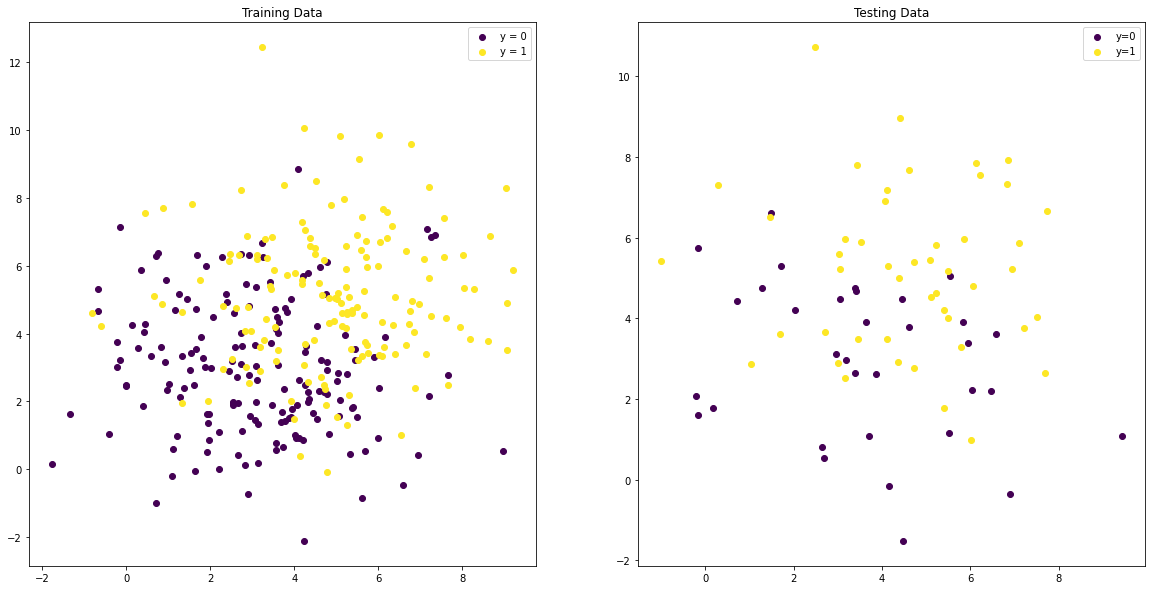

In [6]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
ax[0].scatter(X_train[y_train==0,0],X_train[y_train==0,1],label="y = 0",c="#440154FF")
ax[0].scatter(X_train[y_train==1,0],X_train[y_train==1,1],label="y = 1",c="#FDE725FF")
ax[0].set_title("Training Data")
ax[0].legend()

#ax[1].scatter(X_test[:,0],X_test[:,1],c=y_test)
ax[1].scatter(X_test[y_test==0,0],X_test[y_test==0,1],label="y=0",c="#440154FF")
ax[1].scatter(X_test[y_test==1,0],X_test[y_test==1,1],label="y=1",c="#FDE725FF")
ax[1].set_title("Testing Data")
ax[1].legend()

## Question 3 (20 points)

Build a logistic regression model for the training set in Question 2. Plot the test set with correctly and incorrectly classified
points using different symbols, and show the classification boundary in a plot below. 

In [7]:
# Place code to train the logistic regression model and plot the results here.
class LogisticRegressionModel:
#1. hypothesis function
    def h(self, X, theta):      
        hypothesis = 1/(1+np.exp(-X@theta))
        return hypothesis
        
#2. cost function
    def cost(self, X, y, theta, average = False):
        #expects X to be a design matrix, y to be a column vector and theta to be a column vector
        if(average == False):
            J = -(y.T@np.log(self.h(X,theta)) + (1-y).T@np.log(1-self.h(X,theta)))
        else:
            J = -(y.T@np.log(self.h(X,theta)) + (1-y).T@np.log(1-self.h(X,theta)))/(X.shape[0])
        return J

#3. gradient function
    def gradient(self, X, y, theta, average = False):
        if(average == False):
            dJ = -X.T@(y-self.h(X,theta))
        else:
            dJ = -X.T@(y-self.h(X,theta))/(X.shape[0])
        return dJ
    
    def hessian(self, X, theta, average = False):
        y_pred = self.h(X,theta)
        if(average == False):
            hess_mat = X.T@X*(y_pred@(1-y_pred))
        else:
            hess_mat = X.T@X*(y_pred@(1-y_pred))/X.shape[0]
        return hess_mat
    
#4. batch gradient descent
    def batch_gd(self, X, y, initial_theta, max_iteration, alpha, tolerance = 0,average = False):
        cost = []
        theta = initial_theta
        iteration = 0
        cost.append(self.cost(X,y,theta,average))
        for n in range(max_iteration):
            gradient = self.gradient(X,y,theta,average)
            theta = theta - alpha*gradient
            cost.append(self.cost(X,y,theta,average))
            iteration += 1
        cost = np.array(cost)
        return theta,cost,iteration
    
    def newtons_method(self, X, y, initial_theta, max_iteration,average = False):
        cost = []
        theta = initial_theta
        iteration = 0
        cost.append(self.cost(X,y,theta,average))
        for n in range(max_iteration):
            gradient = self.gradient(X,y,theta,average)
            hessian = self.hessian(X,theta,average)
            theta = theta - np.linalg.inv(hessian)@gradient
            cost.append(self.cost(X,y,theta,average))
            iteration += 1
        cost = np.array(cost)
        return theta,cost,iteration
    
#5. predict
    def predict(self,X,theta):
        prediction = self.h(X,theta)
        prediction[prediction >= 0.5] = 1
        prediction[prediction < 0.5] = 0
        return prediction
    
#6. score/error calculation
    def r_squared(self,y,y_pred):
        r_square = 1 - ((np.square(y - y_pred)).sum())/((np.square(y - y.mean())).sum())
        return r_square
    
    def accuracy(self,y,y_pred):
        acc = (y == y_pred).sum()/y.size
        return acc
    
#7. plotting cost
    def plot_cost(self,cost, iteration_no):
        iteration_series = np.arange(0,iteration_no+1)
        ax = plt.axes()
        ax.plot(iteration_series, cost)

In [8]:
def standardScaler(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    X_norm = (X-mean)/std
    return X_norm, mean, std

def standardUnScaler(X, mean, std):
    X_unscaled = X*std+mean
    return X_unscaled

In [9]:
X_train_norm,mean,std = standardScaler(X_train)

X_test_norm = (X_test-mean)/std

print(X_train_norm.shape,X_test_norm.shape)
X_train_norm = np.insert(X_train_norm,0,1,axis=1)
X_test_norm = np.insert(X_test_norm,0,1,axis=1)
print(X_train_norm.shape,X_test_norm.shape)

(320, 2) (80, 2)
(320, 3) (80, 3)


In [10]:
initial_theta = np.zeros(X_train_norm.shape[1])
print(initial_theta.shape)

(3,)


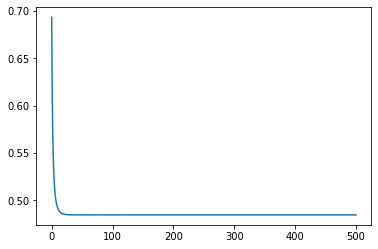

In [11]:
Log = LogisticRegressionModel()

iterations = 500
alpha = 1

theta,cost,iteration_no = Log.batch_gd(X_train_norm,y_train,initial_theta,iterations,alpha,average=True)
Log.plot_cost(cost,iteration_no)

[1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0.
 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 1.]
Accuracy: 0.7


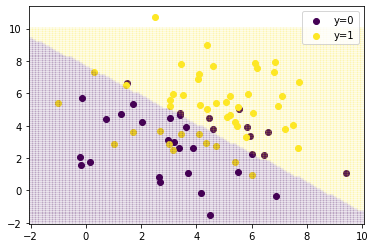

In [12]:
y_pred = Log.predict(X_test_norm,theta)
print(y_pred)
print("Accuracy:",Log.accuracy(y_test,y_pred))

resolution = 100
x_series = np.linspace(-2,10,resolution)
y_series = np.linspace(-2,10,resolution)

x_mesh,y_mesh = np.meshgrid(x_series,y_series)

x_mesh = x_mesh.reshape(-1,1)
y_mesh = y_mesh.reshape(-1,1)

mesh = np.append(x_mesh,y_mesh,axis=1)
mesh_norm = (mesh-mean)/std
mesh_norm = np.insert(mesh_norm,0,1,axis=1)

y_pred = Log.predict(mesh_norm,theta)

x_mesh = x_mesh.reshape(resolution,resolution)
y_mesh = y_mesh.reshape(resolution,resolution)
y_pred = y_pred.reshape(resolution,resolution)

ax = plt.axes()
ax.scatter(X_test[y_test==0,0],X_test[y_test==0,1],label="y=0",c="#440154FF")
ax.scatter(X_test[y_test==1,0],X_test[y_test==1,1],label="y=1",c="#FDE725FF")
ax.pcolormesh(x_mesh,y_mesh,y_pred,shading='auto',alpha=0.1)
ax.legend()

## Question 4 (10 points)

Explain why it is not possible to train a SVM using the techniques we've studied so far in class to classify the data from Question 2. Give a value for $\mu_2$ in Question 2 keeping the other values constant that would make it very likely that the training could be classified using the SVM techniques we studied so far in class.

*Write your answer here*
>The svm methods we studied so far require the data to be seperable (linearly, or non-linearly depending on the kernel we use). Although theoretically a gaussian kernel will be able to fit any data, if there are overlaps in 2 different data points, the algorithm will not be able to correctly classify those two points, and also will not be able to fit to the data because no value of sigma will be able to create a difference between those two points. But even if there aren't any overlaps, there are numerical errors which practically limits how seperable a data is. Therefore, with what we've learnt so far, there isn't really a good way to deal with this problem. A good value for $\mu_2$ would be a value which makes the datapoints created by $\mu_2$ far from the datapoints created by $\mu_1$. Since the variance is 4 for both the data points, the std will be 2, if the means are about 4-5 stds away from each other, it will be extremely likely for the SVM to be able to fit and classify the two classes. So an example would be $\mu_2 = \begin{bmatrix}-7 \\ 3 \end{bmatrix}$, which would set those two means to be exactly 5 std away from each other. 

## Question 5 (10 points)

Suppose you are building a linear SVM in $\mathbb{R}^2$. The two classes are represented as 'X's and 'O's in the diagram below.

<img src="http://www.cs.ait.ac.th/~mdailey/class/ml/q2.jpg" width="400"></img>

If the training data consisted only of the four examples A, B, C, and D in the diagram above, which would be the support
vectors?

*Place your answer here*

>A,B,and D will be the support vectors as they are used to respresent the minimum margin between the two classes.

## Question 6 (10 points)

In Question 3 (the linear SVM),
if you were told that Lagrange multipliers $\alpha_A = 1.0$ and $\alpha_D = 2.0$, what would $\alpha_B$ and $\alpha_C$ be?

*Place your answer here*

>$\alpha_B$ = 1 and $\alpha_C$ = 0

## Question 7 (10 points)

Suppose the optimal linear SVM for Question 3 had $\mathbf{w} = \begin{bmatrix} 1 & 1 \end{bmatrix}^\top$ and $b = -2$.
Find the geometric margin $\gamma^{(i)}$ for $\mathbf{x}^{(i)} = \begin{bmatrix} 2 & 5 \end{bmatrix}^\top$ and $y^{(i)} = 1$. 

*Place your answer here*

> $\frac{5}{\sqrt{2}}$

## Question 8 (10 points)

Consider the SVM kernel $K(\mathbf{x},\mathbf{z}) = (\mathbf{x}^\top \mathbf{z})^2$. Explain the similarities and differences between a SVM with this kernel and a logistic regression using a quadratic polynomial transformation (an ordinary logistic regression preceeded by a transformation of the input vector. If they are exactly the same, prove it. If not, clearly explain how they are different.

*Place your answer here*

There are several dissimilarities.

1. logistic regression with a polynomial transformation also has linear terms when finding theta@X but by using $(\mathbf{x}^\top \mathbf{z})^2$, we are only going to get quadratic terms, for example, if x is 2 dimensional, SVM's prediction function will have the terms $c_1*x_1^2 + c_2*x_1*x_2 + c_3*x_2^2 + b$ while logistic regression will have $c_1*x_1 + c_2*x_2 + c_3*x_1*x_2 + c_4*x_1^2 + c_5*x_2^2 + b$ (note that the constants may not be equal). 
2. Secondly, Logistic Regression uses the average off all the datapoints to get the model, but although SVM initially finds the lagrange multipliers using all the datapoints, only a subset of the training data(support vectors) will have a say on the final predicting model, this fundamental difference will make the two learning algorithms differ even if their predictor functions as given in (1) were the same.